# Сегментация методами водораздела

In [67]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [68]:
img = cv.imread('watershed.png', cv.COLOR_BGR2GRAY)

In [69]:
def show(image):
    plt.figure(figsize=(4,4))
    plt.imshow(image, cmap="gray")
    #plt.axis('off')
    #plt.title(text)
    plt.show()

### Исходное изображение

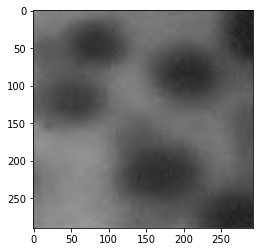

In [70]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
show(img)

## Градиент

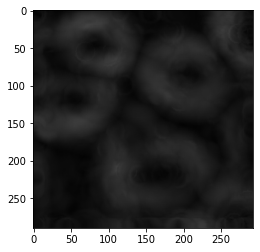

In [71]:
gr = cv.circle(np.zeros((27, 27), np.uint8), (13,13), 13, 1)
d = cv.dilate(img,gr)
e = cv.erode(img,gr)
r = d-e
show(r)

In [72]:
 kernel = np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ], dtype=np.uint8)

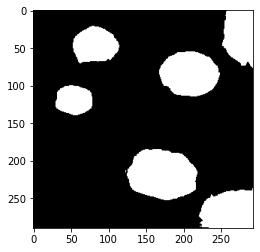

In [73]:
ret, thresh = cv.threshold(gray,71,255,cv.THRESH_BINARY_INV)
show(thresh)

* Градиент - разница дилатации и эрозии

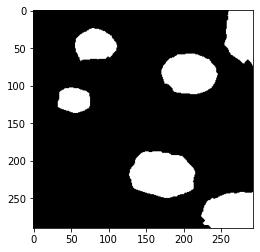

In [74]:
erode = cv.erode(thresh, kernel, iterations=3)
show(erode)

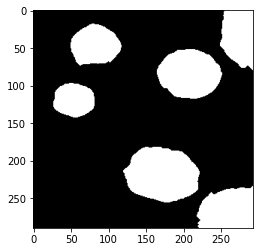

In [75]:
dilate = cv.dilate(thresh, kernel, iterations=3)
show(dilate)

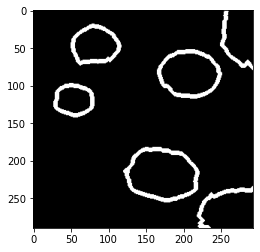

In [76]:
rez=dilate-erode
show(rez)

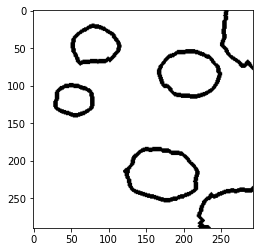

In [77]:
_, dilate_inv = cv.threshold(rez, 1, 128, cv.THRESH_BINARY_INV)
show(dilate_inv)

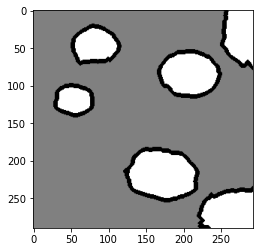

In [78]:
gradient = cv.add(erode, dilate_inv)
show(gradient)

* Находим маркеры, которые являются линиями водораздела

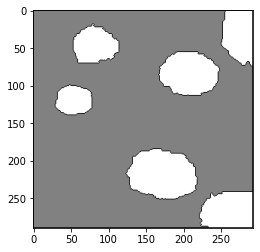

In [79]:
gradient = np.int32(gradient)
marker = cv.watershed(img, gradient)
show(marker)

* Накладываем линии водораздела поверх градиентного и исходного изображений

In [80]:
gradient_watershed = r.copy()
original_watershed = img.copy()
gradient_watershed[marker == -1] = [255]
original_watershed[marker == -1] = [255, 255, 255]

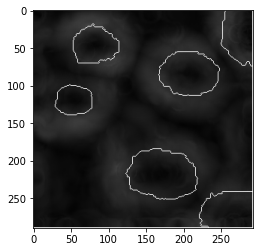

In [81]:
show(gradient_watershed)

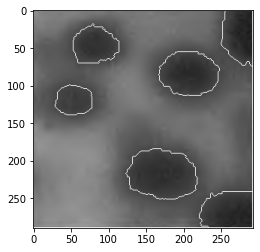

In [82]:
show(original_watershed)